In [103]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%config InlineBackend.figure_format = 'retina'

# Q1 chart

In [317]:
data = dict(
    segment=['Segment 1','Segment 2','Segment 3','Segment 4','Segment 5','Segment 6','Segment 7'],
    us=[16,7,10,10,10,32,15],
    our=[9,10,15,18,17,20,11])

customer = pd.DataFrame(data)
customer = customer[['us','our']].T
customer.columns = data['segment']


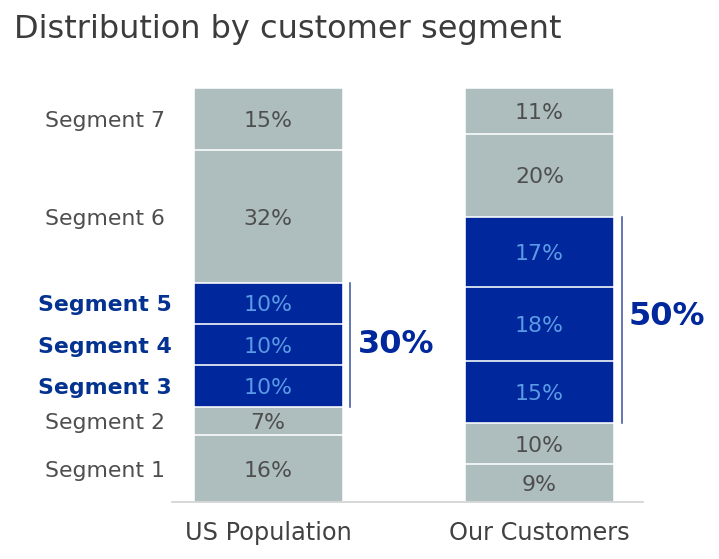

In [321]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

for i, columns in enumerate(reversed(customer.columns)):
    bar_color = ('#00279B' if i in [2,3,4] else '#AEBDBE')
    bar_height = customer.loc[:, :columns].sum(axis=1)
    label_height = bar_height - customer.loc[:, columns] / 2 - 1.8
    label_color = ('#5B9AE5' if i in [2,3,4] else '#4E4E4E')
    label_weight = ('bold' if i in [2,3,4] else 'regular')
    axis_color = ('#033290' if i in [2,3,4] else '#4E4E4E')
    
    # draw segments
    ax.bar(customer.index, bar_height
          ,color=bar_color, edgecolor='white', linewidth=0.8
          ,width=0.55)
    
    # label segments
    for i, height in enumerate(label_height):
        ax.text(i, height, str(customer.loc[:, columns][i]) + '%' , 
                ha='center', color=label_color, 
                fontdict=dict(fontsize=11
               ,weight='light'))
    # label axis        
    ax.text(-0.6, label_height[0], columns, 
        ha='center', color=axis_color, 
        fontdict=dict(fontsize=11
        ,weight=label_weight))
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#CDD0CE')
ax.get_yaxis().set_visible(False)
ax.tick_params(length=6, color='white')

ax.set_xticks([0,1])
ax.set_xticklabels(['US Population','Our Customers']
                   ,fontsize=12
                  ,color='#414141', fontweight='medium')

# draw annotations

ax.plot([0.55/2*1.1,0.55/2 *1.1], [23,53], c='#415BA3', lw=.8)
ax.plot([0.55/2*1.1+1,0.55/2 *1.1+1], [19,69], c='#415BA3', lw=.8)
ax.text(0.55/2*1.2, 36, '30%', ha='left', 
        color='#00279B', fontsize=16, fontweight='bold')
ax.text(0.55/2*1.2+1, 43, '50%', ha='left', 
        color='#00279B', fontsize=16, fontweight='bold')

# add title
ax.set_title('Distribution by customer segment' +' '*8
             ,loc='right' ,pad=15
            ,fontsize=16 ,color='#3C3C3C', fontweight='roman')

plt.tight_layout()
plt.show()